In [ ]:
!pip install dash dash-bootstrap-components pandas plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 20.2 MB/s eta 0:00:00


In [ ]:
pip install pandas plotly dash

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Memuat dataset
df = pd.read_csv('/content/data_finish.csv')

# Memastikan kolom 'date' dalam format datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')

# Menambahkan kolom 'month' untuk visualisasi bulanan
df['month'] = df['date'].dt.to_period('M')

# Memeriksa nama kolom dalam dataset
print(df.columns)

# Membuat aplikasi Dash
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H1("Dashboard Banjir Jakarta 2016"), className="mb-2")
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(id='banjir-frekuensi-graph'), md=6),
        dbc.Col(dcc.Graph(id='curah-hujan-graph'), md=6)
    ]),
    dbc.Row([
        dbc.Col(html.Div("Tanggal Mulai:")),
        dbc.Col(dcc.DatePickerRange(
            id='date-picker-range',
            start_date=df['date'].min(),
            end_date=df['date'].max(),
            display_format='YYYY-MM-DD'
        )),
    ], className="mb-4"),
])

@app.callback(
    [Output('banjir-frekuensi-graph', 'figure'),
     Output('curah-hujan-graph', 'figure')],
    [Input('date-picker-range', 'start_date'),
     Input('date-picker-range', 'end_date')]
)
def update_graphs(start_date, end_date):
    # Filter data berdasarkan tanggal yang dipilih
    mask = (df['date'] >= start_date) & (df['date'] <= end_date)
    filtered_df = df.loc[mask]

    # Menghitung frekuensi kejadian banjir per bulan
    banjir_freq = filtered_df['month'].value_counts().sort_index()
    banjir_freq_df = pd.DataFrame({'month': banjir_freq.index.astype(str), 'jumlah_banjir': banjir_freq.values})

    # Membuat grafik frekuensi banjir
    fig_banjir = px.bar(banjir_freq_df, x='month', y='jumlah_banjir', title='Frekuensi Kejadian Banjir per Bulan')

    # Memeriksa kolom curah hujan yang benar
    if 'RR' in filtered_df.columns:
        fig_hujan = px.line(filtered_df, x='date', y='RR', title='Curah Hujan Bulanan')
    else:
        # Menggunakan kolom yang benar jika 'curah_hujan' tidak ditemukan
        fig_hujan = px.line(title='Kolom RR tidak ditemukan')

    return fig_banjir, fig_hujan

if __name__ == '__main__':
    app.run_server(debug=True)


<ipython-input-3-b7c2101b78f0>:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-3-b7c2101b78f0>:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


Index(['date', 'Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x',
       'ff_avg', 'ddd_car', 'station_id', 'station_name', 'region_name',
       'flood', 'month'],
      dtype='object')


<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import plotly.express as px

# Membaca file Excel
file_path_1 = '/content/Keadaan Iklim (1).xlsx'
file_path_2 = '/content/Keadaan Iklim.xlsx'

data_1 = pd.read_excel(file_path_1)
data_2 = pd.read_excel(file_path_2)

# Menampilkan beberapa baris pertama dari masing-masing dataset untuk memahami strukturnya
data_1_head = data_1.head()
data_2_head = data_2.head()

print("Dataset 1: Keadaan Iklim (1)")
print(data_1_head)

print("\nDataset 2: Keadaan Iklim")
print(data_2_head)

Dataset 1: Keadaan Iklim (1)
      Bulan      Keadaan Iklim Unnamed: 2 Unnamed: 3  \
0       NaN  Curah Hujan (mm3)        NaN        NaN   
1       NaN               2017       2018       2019   
2   Januari              214.1      215.1      382.2   
3  Februari              520.8      431.2      270.1   
4     Maret              138.7      188.6      327.3   

                    Unnamed: 4 Unnamed: 5 Unnamed: 6          Unnamed: 7  \
0  Banyaknya Hari Hujan (hari)        NaN        NaN  Tekanan Udara (mb)   
1                         2017       2018       2019                2017   
2                         19.0       23.0       26.0              1011.0   
3                         24.0       24.0       18.0              1010.0   
4                         15.0       22.0       23.0              1010.0   

  Unnamed: 8 Unnamed: 9             Unnamed: 10 Unnamed: 11 Unnamed: 12  \
0        NaN        NaN  Kecepatan Angin (knot)         NaN         NaN   
1       2018       2019    

In [ ]:
import pandas as pd

# Muat dataset
file_path = '/content/Filedata Data Daerah Rawan Banjir DKI Jakarta.csv'
data = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama dari dataset untuk melihat strukturnya
print("Beberapa baris pertama dari dataset:")
print(data.head())

# Menghapus baris dengan nilai yang hilang
data_cleaned = data.dropna()

# Tampilkan informasi umum dari dataset
print("\nInformasi umum dari dataset setelah menghapus nilai yang hilang:")
print(data_cleaned.info())

# Hitung jumlah daerah rawan banjir per kecamatan
flood_areas_per_wilayah = data_cleaned['wilayah'].value_counts().reset_index()
flood_areas_per_wilayah.columns = ['Wilayah', 'Jumlah Daerah Rawan Banjir']

# Tampilkan tabel hasil
print("\nJumlah Daerah Rawan Banjir per Wilayah:")
print(flood_areas_per_wilayah)

# Jika ingin menampilkan dalam bentuk tabel HTML yang lebih rapi (misalnya untuk laporan):
from IPython.display import display, HTML

display(HTML(flood_areas_per_wilayah.to_html(index=False)))

Beberapa baris pertama dari dataset:
         wilayah   kecamatan         kelurahan  rw  periode_data
0  Jakarta Barat  CENGKARENG  CENGKARENG BARAT   9          2014
1  Jakarta Barat  CENGKARENG  CENGKARENG BARAT  10          2014
2  Jakarta Barat  CENGKARENG  CENGKARENG BARAT  11          2014
3  Jakarta Barat  CENGKARENG  CENGKARENG BARAT  12          2014
4  Jakarta Barat  CENGKARENG  CENGKARENG BARAT  13          2014

Informasi umum dari dataset setelah menghapus nilai yang hilang:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   wilayah       566 non-null    object
 1   kecamatan     566 non-null    object
 2   kelurahan     566 non-null    object
 3   rw            566 non-null    int64 
 4   periode_data  566 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 22.2+ KB
None

Jumlah Daerah Rawan Banjir per Wilayah:
           W

Wilayah,Jumlah Daerah Rawan Banjir
Jakarta Utara,194
Jakarta Timur,168
Jakarta Barat,83
Jakarta Selatan,83
Jakarta Pusat,38


In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html

# Inisialisasi aplikasi Dash
app = dash.Dash(__name__)

# Tentukan layout dashboard
app.layout = html.Div(children=[
    html.H1(children='Dashboard Daerah Rawan Banjir DKI Jakarta'),

    dcc.Graph(
        id='flood-areas-bar-chart',
        figure=fig
    )
])

# Jalankan server Dash
if __name__ == '__main__':
    app.run_server(debug=True)

<ipython-input-6-8541ac6d8080>:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-6-8541ac6d8080>:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


NameError: name 'fig' is not defined

In [ ]:
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html

# Muat dataset
file_path = '/content/Filedata Data Daerah Rawan Banjir DKI Jakarta.csv'
data = pd.read_csv(file_path)

# Menghapus baris dengan nilai yang hilang
data_cleaned = data.dropna()

# Hitung jumlah daerah rawan banjir per kecamatan
flood_areas_per_wilayah = data_cleaned['wilayah'].value_counts().reset_index()
flood_areas_per_wilayah.columns = ['Wilayah', 'Jumlah Daerah Rawan Banjir']

# Buat grafik batang
fig = px.bar(flood_areas_per_wilayah, x='Wilayah', y='Jumlah Daerah Rawan Banjir',
             title='Jumlah Daerah Rawan Banjir per Wilayah di DKI Jakarta',
             labels={'Wilayah': 'Wilayah', 'Jumlah Daerah Rawan Banjir': 'Jumlah Daerah Rawan Banjir'})

# Inisialisasi aplikasi Dash
app = Dash(__name__)

# Tentukan layout aplikasi
app.layout = html.Div([
    html.H1('Data Daerah Rawan Banjir DKI Jakarta'),
    dcc.Graph(
        id='flood-areas-bar-chart',
        figure=fig
    )
])

# Jalankan aplikasi
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

Testing training

RR       1
ff_x     0
flood    0
dtype: int64
Jumlah NaN dalam X_train: 1
Jumlah NaN dalam y_train: 0
Jumlah NaN dalam X_test: 0
Jumlah NaN dalam y_test: 0
Jumlah NaN dalam X_train setelah penggantian: 0
Jumlah NaN dalam y_train setelah penggantian: 0
Jumlah NaN dalam X_test setelah penggantian: 0
Jumlah NaN dalam y_test setelah penggantian: 0
Epoch 1/50
158/158 [==============================] - 7s 11ms/step - loss: 0.0598 - val_loss: 0.1056
Epoch 2/50
158/158 [==============================] - 1s 6ms/step - loss: 0.0574 - val_loss: 0.1025
Epoch 3/50
158/158 [==============================] - 1s 7ms/step - loss: 0.0565 - val_loss: 0.1044
Epoch 4/50
158/158 [==============================] - 1s 5ms/step - loss: 0.0565 - val_loss: 0.1057
Epoch 5/50
158/158 [==============================] - 1s 6ms/step - loss: 0.0563 - val_loss: 0.1047
Epoch 6/50
158/158 [==============================] - 1s 8ms/step - loss: 0.0566 - val_loss: 0.1051
Epoch 7/50
158/158 [==============================] -

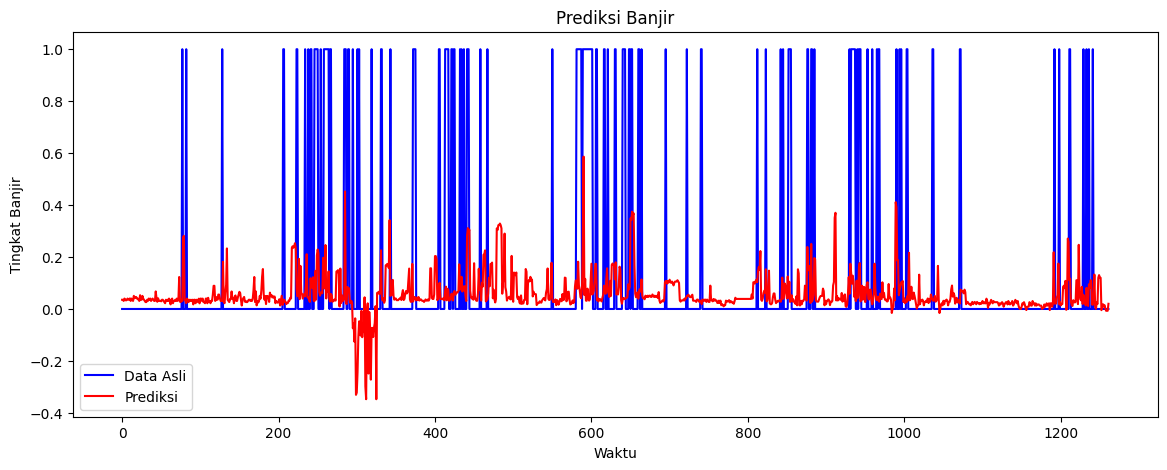

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Memuat dataset
df = pd.read_csv('/content/data_finish.csv')

# Memastikan kolom 'date' dalam format datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')

# Mengisi nilai yang hilang dengan forward fill (pad)
df.fillna(method='pad', inplace=True)

# Menambahkan kolom 'month' untuk analisis bulanan
df['month'] = df['date'].dt.to_period('M')

# Kolom yang relevan
features = ['RR', 'ff_x']
target = 'flood'

# Mengambil subset data yang relevan
data = df[features + [target]]

# Normalisasi fitur
scaler_features = MinMaxScaler()
data_scaled_features = scaler_features.fit_transform(data[features])

# Normalisasi target
scaler_target = MinMaxScaler()
data_scaled_target = scaler_target.fit_transform(data[[target]])

# Menggabungkan fitur yang sudah dinormalisasi dan target yang sudah dinormalisasi
data_scaled = pd.DataFrame(data_scaled_features, columns=features)
data_scaled[target] = data_scaled_target

# Memeriksa apakah ada NaN dalam data setelah normalisasi
print(data_scaled.isnull().sum())

# Membagi data menjadi data pelatihan dan pengujian
train_data, test_data = train_test_split(data_scaled, test_size=0.2, shuffle=False)

# Memisahkan fitur dan target
X_train = train_data[features].values
y_train = train_data[target].values
X_test = test_data[features].values
y_test = test_data[target].values

# Mengubah data menjadi bentuk 3D untuk LSTM [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Memastikan tidak ada NaN dalam data sebelum masuk ke model
print(f'Jumlah NaN dalam X_train: {np.isnan(X_train).sum()}')
print(f'Jumlah NaN dalam y_train: {np.isnan(y_train).sum()}')
print(f'Jumlah NaN dalam X_test: {np.isnan(X_test).sum()}')
print(f'Jumlah NaN dalam y_test: {np.isnan(y_test).sum()}')

# Menggantikan NaN dengan nilai rata-rata dari kolom tersebut jika ada
X_train = np.nan_to_num(X_train, nan=np.nanmean(X_train))
y_train = np.nan_to_num(y_train, nan=np.nanmean(y_train))
X_test = np.nan_to_num(X_test, nan=np.nanmean(X_test))
y_test = np.nan_to_num(y_test, nan=np.nanmean(y_test))

# Memastikan tidak ada NaN dalam data setelah penggantian
print(f'Jumlah NaN dalam X_train setelah penggantian: {np.isnan(X_train).sum()}')
print(f'Jumlah NaN dalam y_train setelah penggantian: {np.isnan(y_train).sum()}')
print(f'Jumlah NaN dalam X_test setelah penggantian: {np.isnan(X_test).sum()}')
print(f'Jumlah NaN dalam y_test setelah penggantian: {np.isnan(y_test).sum()}')

# Membuat model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Melakukan prediksi
y_pred = model.predict(X_test)

# Mengembalikan skala data ke bentuk aslinya
y_test_original = scaler_target.inverse_transform(y_test.reshape(-1, 1))
y_pred_original = scaler_target.inverse_transform(y_pred)

# Menghitung metrik evaluasi
mse = mean_squared_error(y_test_original, y_pred_original)
print(f'Mean Squared Error: {mse}')

# Visualisasi hasil prediksi vs data asli
plt.figure(figsize=(14, 5))
plt.plot(y_test_original, color='blue', label='Data Asli')
plt.plot(y_pred_original, color='red', label='Prediksi')
plt.title('Prediksi Banjir')
plt.xlabel('Waktu')
plt.ylabel('Tingkat Banjir')
plt.legend()
plt.show()